In [8]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.3/38.6 MB 2.2 MB/s eta 0:00:18
    --------------------------------------- 0.8/38.6 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.2/38.6 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.6 MB 7.0 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/38.6 MB 8.0 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/38.6 MB 9.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.3/38.6 MB 10.5 MB/s eta 0:00:04
   ----- ----

In [1]:
pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     --------------------------- ---------- 41.0/

In [3]:
img_array=cv2.imread("Training/0/Training_68010171.jpg")

In [4]:
img_array.shape

(48, 48, 3)

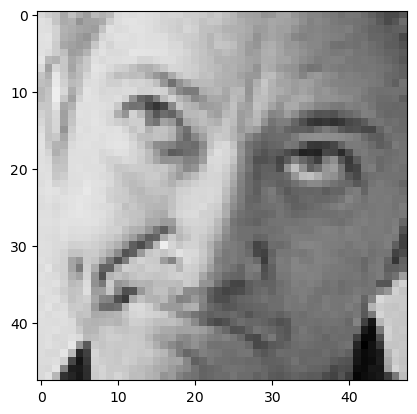

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory="Training/"

In [7]:
Classes=["0","1","2","3","4","5","6"]

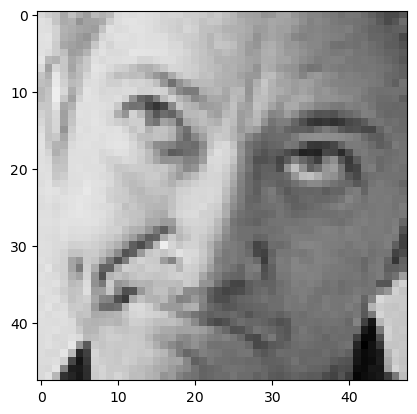

In [8]:
for category in Classes:
    path=os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

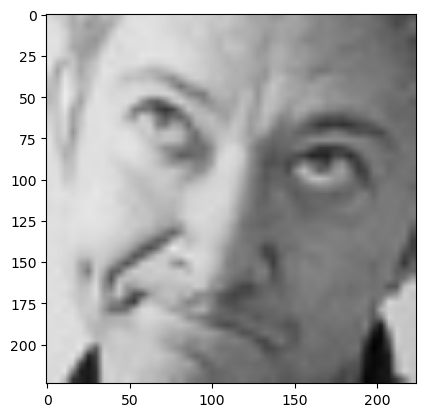

In [9]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory, category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

5496


In [14]:
import random

random.shuffle(training_Data)

In [15]:
X=[]
y=[]

for features ,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)

In [16]:
X.shape

(5496, 224, 224, 3)

In [17]:
X=X/255.0;

In [18]:
y[10]

6

In [19]:
Y=np.array(y)

In [20]:
Y.shape

(5496,)

# Deep learning model for training - Transfer Learning

In [21]:
from tensorflow import keras 
from tensorflow.keras import layers 

In [22]:
model = tf.keras.applications.MobileNetV2()

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

# Transfer learning -Tuning ,weights will start from last check point

In [24]:
base_input=model.layers[0].input

In [25]:
base_output=model.layers[-2].output

In [26]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [27]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

In [28]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [31]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [32]:
new_model.fit(X,Y, epochs =25)

Epoch 1/25


172/172 [==============================] - 427s 2s/step - loss: 1.6093 - accuracy: 0.3819
Epoch 2/25
172/172 [==============================] - 371s 2s/step - loss: 1.3153 - accuracy: 0.5129
Epoch 3/25
172/172 [==============================] - 375s 2s/step - loss: 1.1799 - accuracy: 0.5646
Epoch 4/25
172/172 [==============================] - 362s 2s/step - loss: 1.0800 - accuracy: 0.5964
Epoch 5/25
172/172 [==============================] - 244s 1s/step - loss: 0.9714 - accuracy: 0.6366
Epoch 6/25
172/172 [==============================] - 265s 2s/step - loss: 0.8930 - accuracy: 0.6745
Epoch 7/25
172/172 [==============================] - 254s 1s/step - loss: 0.8174 - accuracy: 0.6961
Epoch 8/25
172/172 [==============================] - 248s 1s/step - loss: 0.7229 - accuracy: 0.7369
Epoch 9/25
172/172 [==============================] - 248s 1s/step - loss: 0.6551 - accuracy: 0.7662
Epoch 10/25
172/172 [==============================] - 241s 1s/step - loss: 0.5784 - accu

In [33]:
new_model.save('Final_model_95p07.h5')

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
new_model=tf.keras.models.load_model('Final_model_95p07.h5')

In [10]:
new_model.evaluate

<bound method Model.evaluate of <keras.src.engine.functional.Functional object at 0x0000016936940490>>

In [11]:
frame=cv2.imread("happyboy.jpg")

In [12]:
frame.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [13]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# we need face detection algorithm

In [7]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [8]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [9]:
gray.shape

(346, 525)

In [10]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w, y+h),(225,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not Detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex:ex+ew]
            

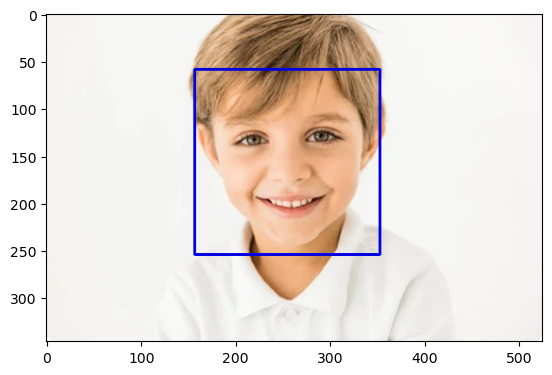

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

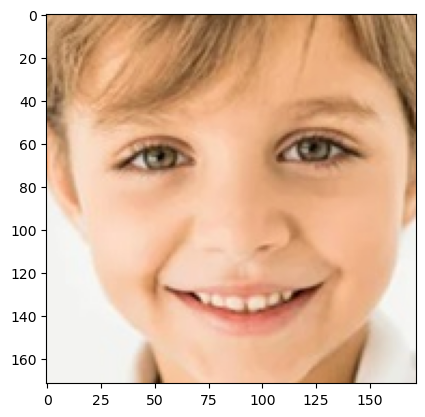

In [12]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [13]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [14]:
Predictions=new_model.predict(final_image)

1/1 [==============================] - 2s 2s/step


In [15]:
Predictions[0]

array([2.8278345e-07, 2.6934330e-09, 1.2987679e-09, 9.9999928e-01,
       3.9434181e-07, 1.7415603e-09, 7.2252647e-08], dtype=float32)

In [16]:
np.argmax(Predictions)

3

# LIVE DEMO

In [17]:
import cv2

path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN


In [18]:
#set the rectangular background to white

rectangle_bgr=(255,255,255)

In [19]:
#make a black image

img=np.zeros((500,500))

In [20]:
#set some text

text="Some text in a box!"

In [21]:
#get the width and height of the text box

(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

In [22]:
#set the text start position

text_offset_x=10
text_offset_y=img.shape[0]-25

In [23]:
#make the coords of the box with a small padding of two pixels

box_coords=((text_offset_x,text_offset_y),(text_offset_x + text_width +2,text_offset_y - text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap=cv2.VideoCapture(1)

In [27]:
#Check if the webcam is opened correctly

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame=cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not Detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
                
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions=new_model.predict(final_image)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions)==0):
        status="Angry"
        
        x1,y1,w1,h1 = 0,0,175,175
        
        #Draw black background rectangle
        cv2.putText(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        #ADD text
        cv2.putText(frame,status,(x1 + int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions)==1):
        status="Disgust"
        
        x1,y1,w1,h1 = 0,0,175,175
        
        #Draw black background rectangle
        cv2.putText(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        #ADD text
        cv2.putText(frame,status,(x1 + int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions)==2):
        status="Fear"
        
        x1,y1,w1,h1 = 0,0,175,175
        
        #Draw black background rectangle
        cv2.putText(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        #ADD text
        cv2.putText(frame,status,(x1 + int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions)==3):
        status="Happy"
        
        x1,y1,w1,h1 = 0,0,175,175
        
        #Draw black background rectangle
        cv2.putText(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        #ADD text
        cv2.putText(frame,status,(x1 + int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.array(Predictions)==4):
        status="Sad"
        
        x1,y1,w1,h1 = 0,0,175,175
        
        #Draw black background rectangle
        cv2.putText(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        #ADD text
        cv2.putText(frame,status,(x1 + int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.array(Predictions)==5):
        status="Surprise"
        
        x1,y1,w1,h1 = 0,0,175,175
        
        #Draw black background rectangle
        cv2.putText(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        #ADD text
        cv2.putText(frame,status,(x1 + int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    else:
        
        status="Neutral"
        
        x1,y1,w1,h1 = 0,0,175,175
        
        #Draw black background rectangle
        cv2.putText(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        #ADD text
        cv2.putText(frame,status,(x1 + int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
        
    cv2.imshow('face emotion recognition',frame)
    if cv2.waitKey(2) & 0xFF== ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
        
        

1/1 [==============================] - 0s 84ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()